In [59]:
import tensorflow as tf
import numpy as np
# import maptlotlib.pyplot as plt

In [60]:
import catapult_ai_nn
import os
import hls4ml
import csv
import pandas as pd

import qkeras

# import ssl
# ssl._create_default_https_context = ssl._create_stdlib_context
# ### Note: Targeting ASIC using the SAED32 library and power estimation/optimization requires setting the env var SAED32_EDK to point to the Synopsys educational design kit
# try:
#     pdk_var = os.environ['SAED32_EDK']
# except KeyError:
#     print('WARNING: Environment variable SAED32_EDK was not found. You will not be able run ASIC RTL synthesis or RTL power estimation')

# script_file = os.path.basename(__session__)
# script_name = os.path.splitext(script_file)
# step = script_name[0]


In [61]:
filepath="/home/dabadjiev/smartpixels_ml_dsabadjiev/Muon_Collider_Smart_Pixels/eric/model2.5_quantized_4w0i_hyperparameter_results_20260222_004048/model_trial_000.h5"

co = {}       
qkeras.utils._add_supported_quantized_objects(co)
quantizedModel = tf.keras.models.load_model(filepath,custom_objects=co,compile=True)
output_dir = "./hlsTmpModel2_02272026"

In [83]:
# config = hls4ml.utils.config_from_keras_model(quantizedModel, granularity='name',backend="Catapult")
config = hls4ml.utils.config.create_config(quantizedModel, granularity='name',backend="Catapult",
                                           tech='asic',
                                           asiclibs='saed32rvt_tt0p78v125c_beh',
                                           asicfifo='hls4ml_lib.mgc_pipe_mem',
                                           # output_dir = output_dir,
                                           project_name="firstCatapultTry",
                                           clock_period = 25,
                                           io_type = "io_parallel",                                           
                                          )
print("aahh")
# hls_model = hls4ml.converters.convert_from_keras_model(quantizedModel, hls_config=config, part = 'xc7z020clg400-1', output_dir=output_dir,backend="Vitis")
hls_model = hls4ml.converters.convert_from_keras_model(quantizedModel, hls_config=config, output_dir=output_dir,backend="Catapult")
# hls_model = hls4ml.converters.keras_to_hls(config)
##Part number input in above line as part='xcu
# part='xcu250-figd2104-2L-e',



Executing create_initial_config
aahh
Executing create_initial_config
Interpreting Model
Topology:
Layer name: x_profile, layer type: InputLayer, input shapes: [[None, 21]], output shape: [None, 21]
Layer name: y_profile, layer type: InputLayer, input shapes: [[None, 13]], output shape: [None, 13]
Layer name: xy_concat, layer type: Concatenate, input shapes: [[None, 21], [None, 13]], output shape: [None, 34]
Layer name: y_local, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: nModule, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: x_local, layer type: InputLayer, input shapes: [[None, 1]], output shape: [None, 1]
Layer name: other_features, layer type: Concatenate, input shapes: [[None, 34], [None, 1]], output shape: [None, 35]
Layer name: nmodule_xlocal_concat, layer type: Concatenate, input shapes: [[None, 1], [None, 1]], output shape: [None, 2]
Layer name: other_dense, layer type: QDense, input shapes: [[N

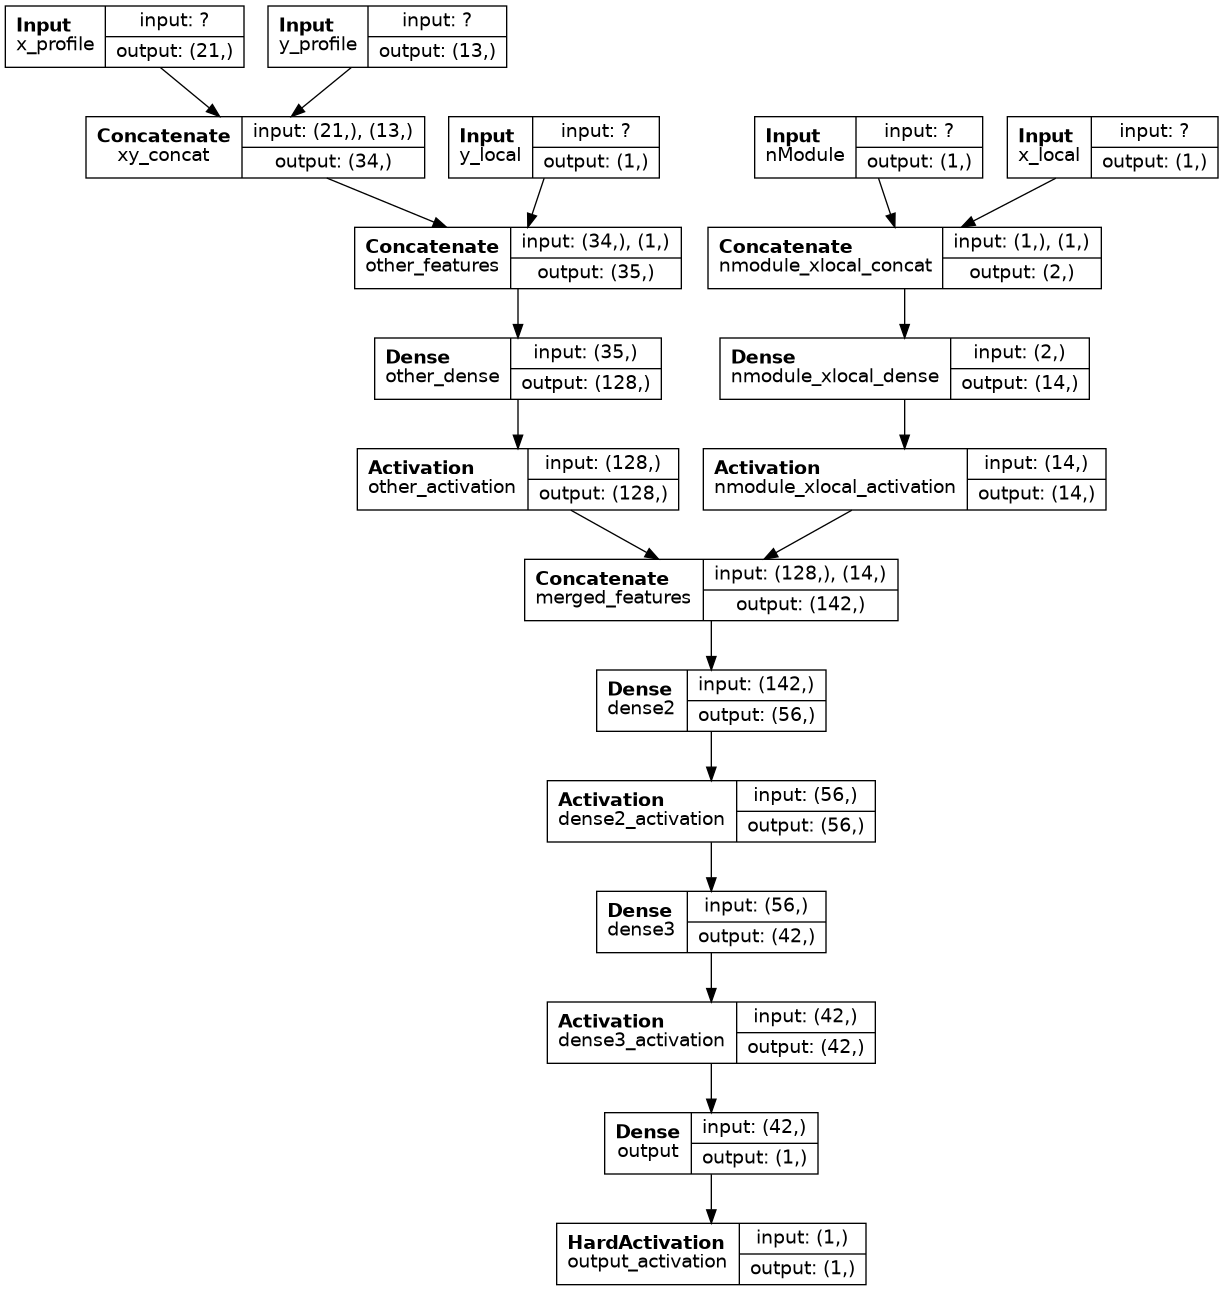

In [76]:
hls4ml.utils.plot_model(hls_model,show_shapes=True,to_file=None)

In [90]:

hls_model.compile()
# hls_model.write() #seems like compile and write do the exact same thing

Writing HLS project
... skipping copy of NNET headers from /code/Siemens_EDA/Catapult_Synthesis_2026.1-1267132/Mgc_home/shared/include/nnet_utils/
... skipping copy of ac_types headers - assumed to located in Catapult install tree
... skipping copy of ac_math headers - assumed to located in Catapult install tree
... skipping copy of ac_simutils headers - assumed to located in Catapult install tree
... skipping copy of ac_ipl headers - assumed to located in Catapult install tree
Done


/home/dabadjiev/ccs_venv/lib/python3.10/site-packages/keras/src/constraints.py:365: UserWarning: The `keras.constraints.serialize()` API should only be used for objects of type `keras.constraints.Constraint`. Found an instance of type <class 'qkeras.quantizers.quantized_bits'>, which may lead to improper serialization.
  warnings.warn(


In [89]:
# hls_model.build(csim=False, synth=True, cosim=True, validation=False, export=True, vsynth=True, reset=True )
hls_model.build(csim=True, synth=False, cosim=False, validation=False, export=True, reset=True,RTLSynth=True )

HLS4ML build() option 'cosim' is being depricated. Use 'SCVerify'
HLS4ML build() option 'validation' is being depricated. Use 'SCVerify'
HLS4ML build() option 'export' is not yet supported
HLS4ML build() option 'synth' is being depricated. Use 'Synth'
Catapult backend build() option overrides: "reset=True csim=True RTLSynth=True"
catapult -product ultra -shell -f build_prj.tcl -eval 'set ::argv "reset=True csim=True RTLSynth=True"'
//  Catapult Ultra Synthesis 2023.2_2/1075281 (Production Release) Tue Nov 14 16:31:40 PST 2023
//  
//          Copyright (c) Siemens EDA, 1996-2023, All Rights Reserved.
//                        UNPUBLISHED, LICENSED SOFTWARE.
//             CONFIDENTIAL AND PROPRIETARY INFORMATION WHICH IS THE
//                   PROPERTY OF SIEMENS EDA OR ITS LICENSORS.
//  
//  Running on Linux dabadjiev@kdplab01 5.14.0-611.20.1.el9_7.x86_64 x86_64 aol
//  
//  Package information: SIFLIBS v26.2_2.0, HLS_PKGS v26.2_2.0, 
//                       SIF_TOOLKITS v26.2_2.0

In [56]:
# model=quantizedModel

# # General project settings
# config_ccs = catapult_ai_nn.config_for_dataflow(model=model,
#                                                 x_test=x_test, y_test=y_test, num_samples=50, 
#                                       default_precision='ac_fixed<16,6>', max_precision='ac_fixed<16,6>',
#                                       default_reuse_factor=1,
#                                       output_dir='my-' + model.name + '-Catapult-test',
#                                       tech='asic',
#                                       asiclibs='saed32rvt_tt0p78v125c_beh',                                     
#                                       asicfifo='hls4ml_lib.mgc_pipe_mem',
#                                       clock_period=10,
#                                       io_type='io_stream',
#                                       csim=0, SCVerify=0, Synth=1)
# # Specific architecture settings
# # Configure input feature precision since it is known
# config_ccs['HLSConfig']['LayerName']['input1']['Precision'] = 'ac_fixed<8,1,true>'
# # Performance strategy is set to latency mode
# config_ccs['HLSConfig']['Model']['Strategy'] = 'Latency'